# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-9 (49일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 이번에는 쉬어가는 페이지로 통계적 가설 검증 정리

## 1. 간단하게 QQ-plot 과 정규분포 검정에 대해서 설명하고자 합니다.

### QQ-plot

* 두 표본데이터 분포가 동일한지 알아보는 도구
* 동일한 분포는 직선

In [118]:
# 1. 정규확률분포
x = seq(-3,3,0.01)
str(x)

 num [1:601] -3 -2.99 -2.98 -2.97 -2.96 -2.95 -2.94 -2.93 -2.92 -2.91 ...


In [119]:
head(x[500:601], 10)

[1] 1.99 2.00 2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08

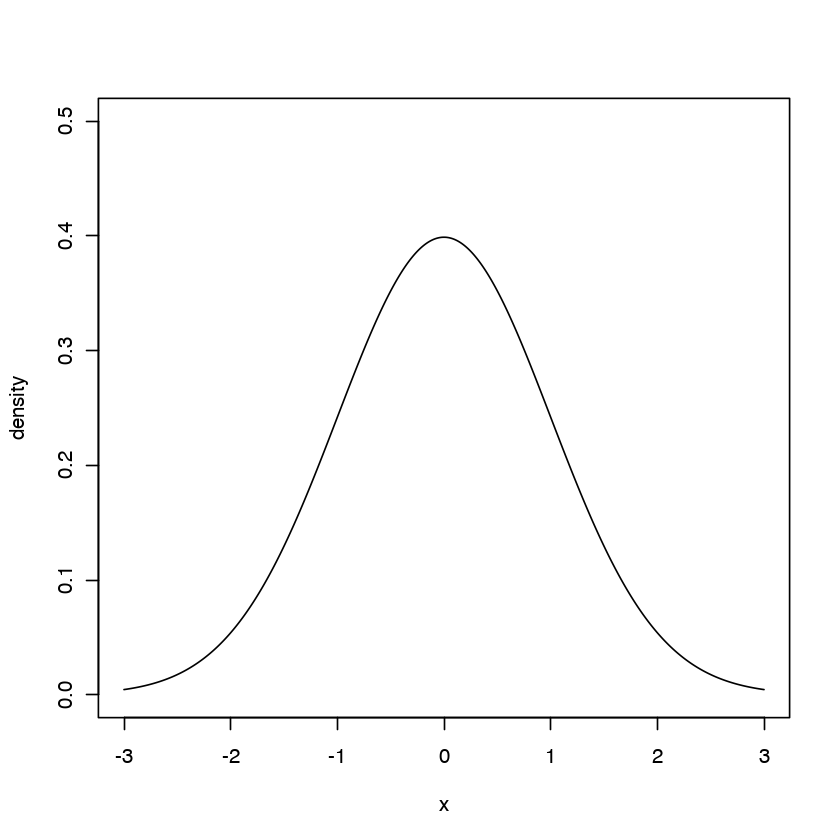

In [127]:
# 밀도함수
y = dnorm(x)
plot(y ~ x, type = "l",ylim=c(0,0.5), ylab="density")

##### 분위수 함수
* qnorm (p, mean = 0, sd = 1,lower.tail = TRUE/FALSE)
* 정규분포를 따르는 모집단에서 특정 누적분포함수 값 p에 해당하는 분위수 q 를 알고 싶을때 사용하는 R 함수가 분위수 함수 qnorm()
* 분위수 함수는 누적분포함수의 역함수 이고, 누적분포함수의 역함수가 분위수 함수 이다.

[1] 1


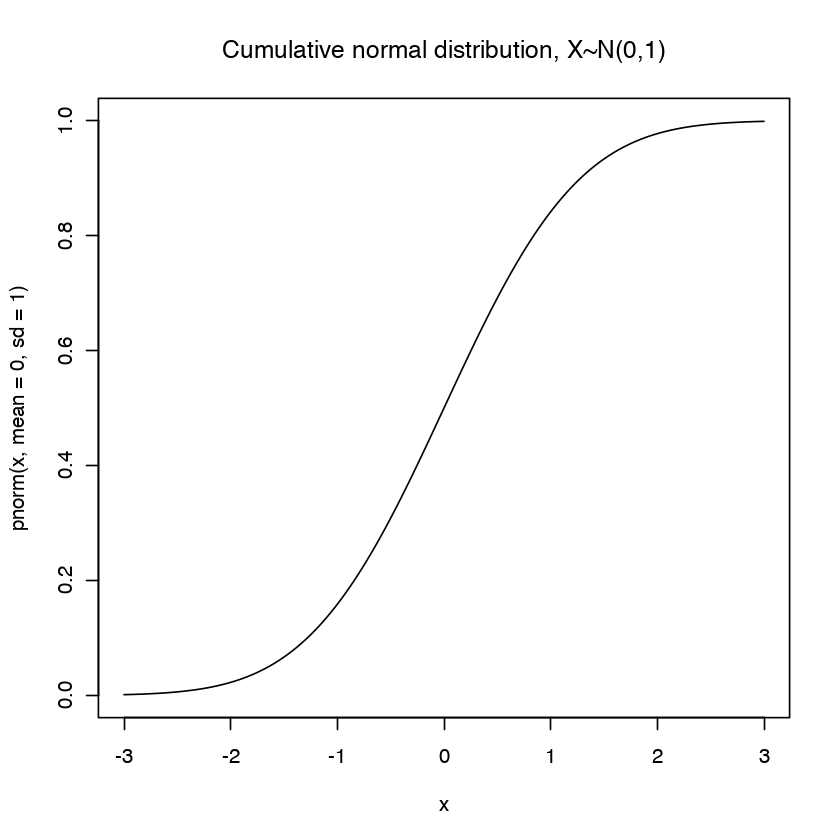

In [132]:
# 누적분포함수와 분위수 함수 는 역관계
print(qnorm(pnorm(1,mean=0, sd=1), mean=0, sd=1))
# 누적분포함수
x = seq(-3, 3, length=200)
plot(x, pnorm(x, mean=0, sd=1), type='l', main="Cumulative normal distribution, X~N(0,1)")

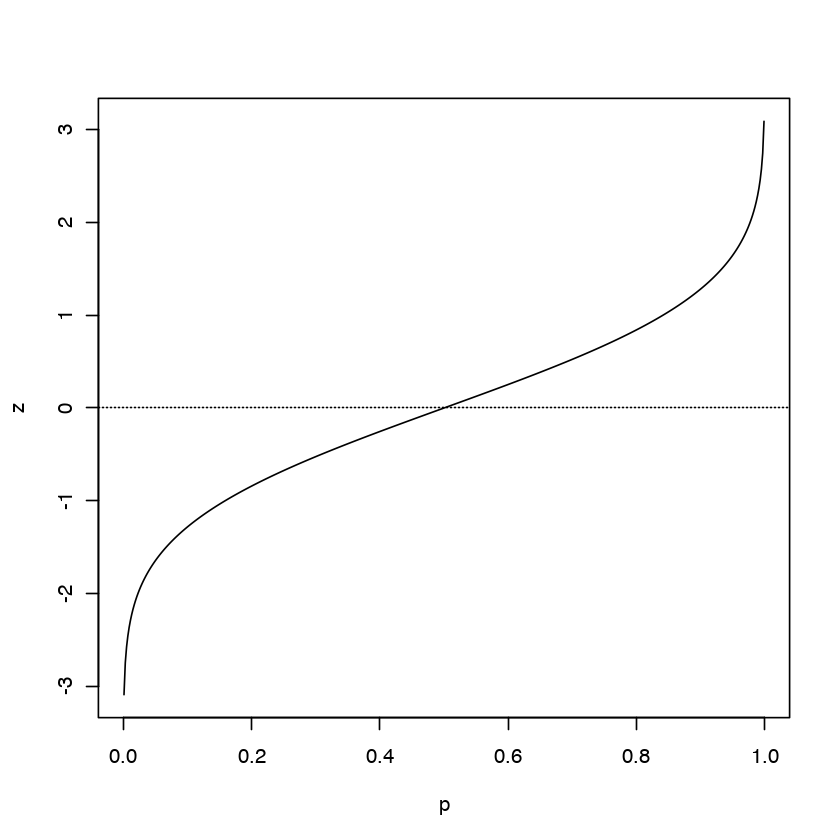

In [145]:
# 분위수 함수
p = (seq(1,500)-0.5) / 500  
z = qnorm(p, mean=0, sd=1)
plot(z ~ p, type="l")
abline(c(0,0), lty="dotted")  # 직선 형태가 되어야 하는데 아님 (직선의 절편: 평균, 기울기:표준편차)

## 2.  정규성 검증

* shapiro.test(), qqnorm(), qqline()

통계적 검정 (statistical testing) 은 모집단의 모수 또는 분포 형태에 대한 추정에 대해 그것이 옳은지 그른지 임의로 추출한 표본으로 부터 통계량을 측정하여 판단하는 통계적 절차를 말합니다.

### 1. 표본이 크고 정규성 충족시

* 단일 모집단 모평균에 대한 신뢰구간 추정과 검정 : t.test()
* 단일 모집단 모분산에 대한 신뢰구간 추정과 검정 : chi-square test
* 단일 모집단 모비율에 대한 신뢰구간 추정과 검정 : prop.test()

### 2. 정규성 미충족 시
* 단일 모집단 중심에 대한 미모수 검정 : wilcox.test()

### 3. 정규성 여부 검정
* 단일 모집단 분포의 정규성 검정 : shapiro.test(), qqnorm(), qqline()

등등이 있습니다. 이에 대한 것은 나중에 시간나면 정리 하기로 하고 지금은 이전에 황소 거래애서 있었던 정규성 여부 검정에 대해서 간단하 설명하기로 합니다.

* 실습할 자료는 UsingR 패키지에 있는 cfb 데이타 프레임 속의 소득 income 을 가지고 예를 들어 보겠습니다.


In [1]:
# install.packages("UsingR")

In [2]:
library(UsingR)

Loading required package: MASS
Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units


Attaching package: ‘UsingR’

The following object is masked from ‘package:survival’:

    cancer



In [3]:
str(cfb)

'data.frame':	1000 obs. of  14 variables:
 $ WGT     : num  5750 5871 8044 6093 7162 ...
 $ AGE     : num  54 40 35 55 40 82 26 50 71 70 ...
 $ EDUC    : num  14 12 14 12 12 12 16 14 12 6 ...
 $ INCOME  : num  66814 42144 25698 35977 39061 ...
 $ CHECKING: num  6000 400 1000 2600 1000 1000 3000 3100 1000 50 ...
 $ SAVING  : num  2000 0 160 19100 8300 0 0 0 0 0 ...
 $ NMMF    : num  0 0 0 0 0 50000 0 0 0 0 ...
 $ STOCKS  : num  500 0 0 0 3500 0 0 0 0 0 ...
 $ FIN     : num  39600 5400 15460 54700 12800 ...
 $ VEHIC   : num  6400 21000 2000 18250 9100 ...
 $ HOMEEQ  : num  84000 8000 12000 90000 47000 175000 0 22000 15000 0 ...
 $ OTHNFIN : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DEBT    : num  40200 58640 19610 8000 21000 ...
 $ NETWORTH: num  170800 17760 9850 284950 268900 ...


#### 1. Shapiro-Wilk normality test : shapiro.test()

* 귀무가설 $H_0$ : 모집단은 정규분포를 따른다
* 대립가설 $H_1$ : 모집단은 정규분포를 따르지 않는다.

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

* 귀무가설은 표본 $x_1, x_2, \cdots, x_n$ 이 정규분포 모집단에서 표본된 것이다.
* 테스트 통계량은 
$
W = \dfrac{(\sum_{i=1}^n a_ix_{(i)})^2}{\sum_{i=1}^n(x_i - \bar x)^2}
$


* $x_{(i)}$ 는 순서 통계량에서 i 번째 작은 통계량
* $\bar x = (x_1 + x_2 + \cdots + x_n) /n$ 으로 표본 평균
* $a_i$ 는 다음과 같이 정의 된다.
   * $(a_1, a_2, \cdots, a_n) = \dfrac{m^TV^{-1}}{(m^TV^{-1}V^{-1}m)^{1/2}}$ 
   * $m = (m_1,\cdots,m_n)^T$ 이고
   * $m_1,\cdots,m_n) 은 정규분포에서 표본된 순서 통계량 이며 $V$ 는 순서통계량의 공분산행렬이다.

#### 공분산 행렬 Covariance Matrix 란

* 데이터의 분산과 공분산을 이용해 만드는 공분산 행렬이 공분산 행렬입니다. 즉 정방행렬의 값을 각 변수의 분산과 공분산으로 채운것입니다.
* 공분산 행렬에서 고유값과 고유벡터를 찾는 문제는 데이터의 주성분을 찾는 것과 동일합니다.
* 공분산 행렬의 고유벡터는 데이터가 어떤 방향으로 분산되어 있는지 나타내며, 고유값은 각 축에 대한 공분산 값이 됩니다. 고유값이 큰 순서대로 정렬되어 중요한 순서대로 주성분을 구하는 것과 같다.
* 공분산과 분산은 기하학적으로 표현하면, 분산은 x축 또는 y 축으로 분산을 나타내고 공분산은 대각선 방향의 분산으로 나타냅니다.

In [4]:
# Shapiro-Wilk normality test
head(cfb$INCOME)

[1] 66814.19 42144.34 25697.77 35976.87 39060.61 13362.84

In [5]:
shapiro.test(cfb$INCOME)


	Shapiro-Wilk normality test

data:  cfb$INCOME
W = 0.36883, p-value < 2.2e-16


#### 히스토그램, 커널밀도 그래프로 정규분포 확인

P 값이 매우 작으므로 귀무가설 $H_0$ 를 기각하고, 대립가설을 채택합니다. 즉 수입은 정규분포를 따르지 않는다. 그래프로 정규분포를 따르는지 그래프로 확인을 해봅니다.
* 이것은 historgram , kernel density plot 를 이용하여 직관적으로 선택합니다.

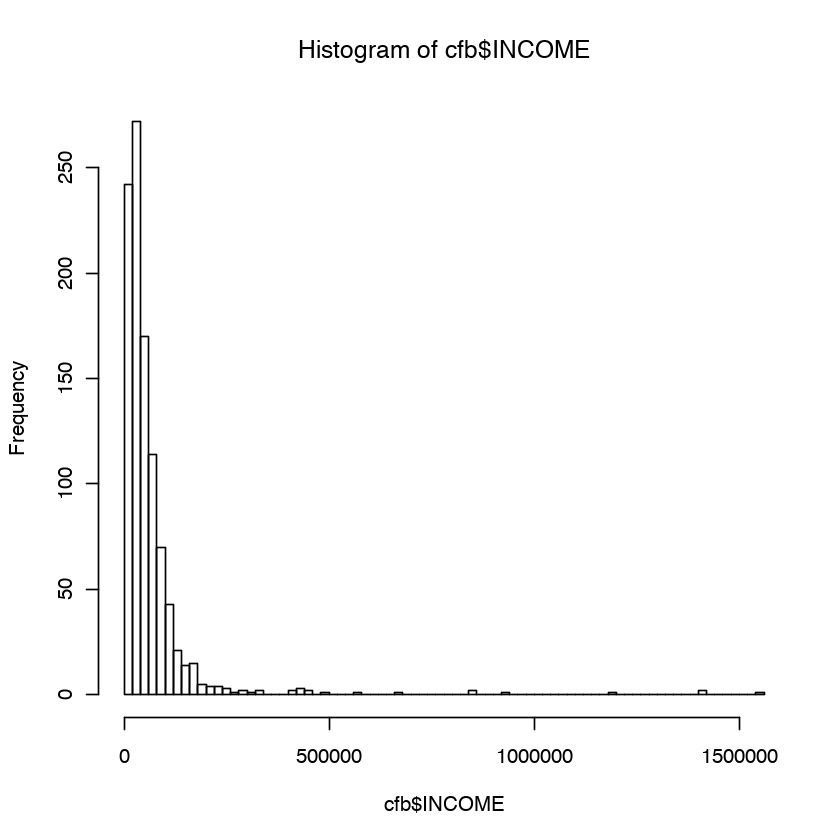

In [6]:
# 히스토그램 hist()
hist(cfb$INCOME, breaks = 100)

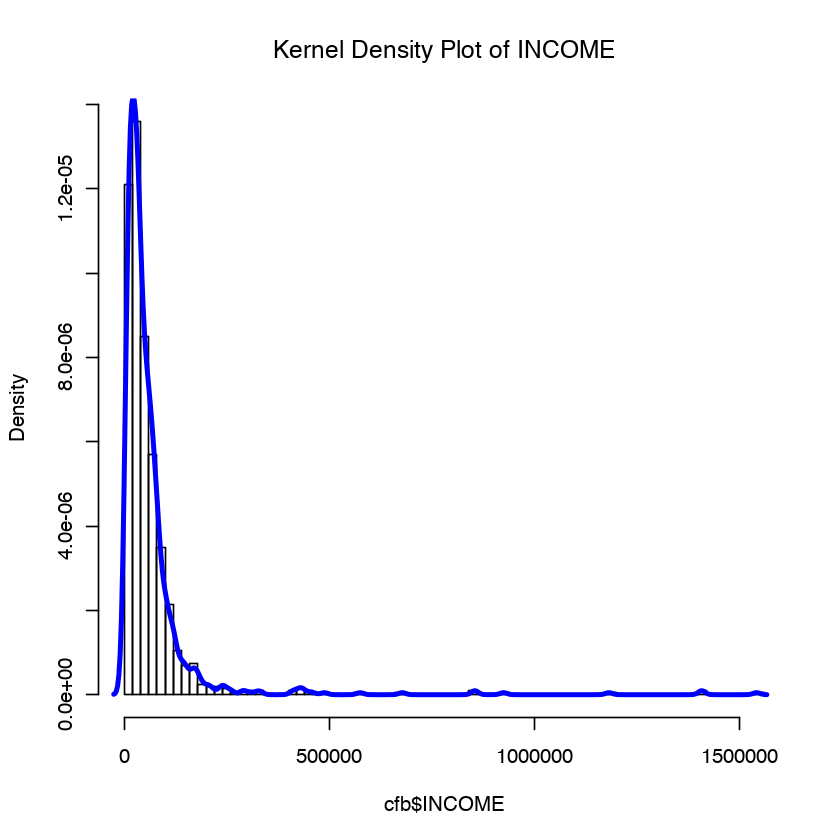

In [7]:
# 커널 밀도 그래프로 그릴경우, Y 축은 Probability 입니다.
# hist(), freq = FALSE 로 설정
hist(cfb$INCOME, freq=FALSE, breaks = 100, main="Kernel Density Plot of INCOME")
lines(density(cfb$INCOME), col="blue", lwd=3)

분포는 두개의 그래프를 보면 수입은 멱함수 또는 F-분포 를 따르고 있음. 정규분포와는 거리가 멀게 보입니다.

INCOME 을 로그로 변환하면 어떻게 될까요? 호기심.. 정규화 변환 하는 방법중의 한 방법입니다.


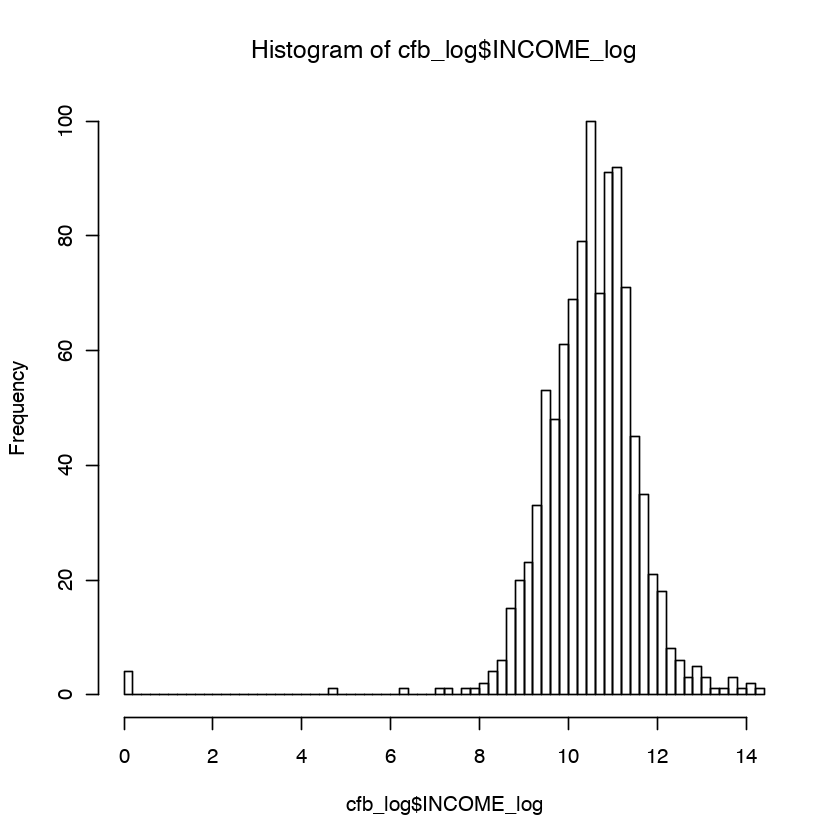

In [9]:
cfb_log = transform(cfb, INCOME_log = log(INCOME + 1))
hist(cfb_log$INCOME_log, breaks = 100, freq = T)

In [12]:
# 로그변환 하면 정규분포 모습을 갖고 있으나. shapiro.test() 는 결과가 이상하게 나옵니다. 검토 해야 할 것 같음.
shapiro.test(cfb_log$INCOME_log)


	Shapiro-Wilk normality test

data:  cfb_log$INCOME_log
W = 0.82171, p-value < 2.2e-16


#### Q-Q PLOT 이용한 정규성 확인 : qqnormal(x), qqline(x)

* Q-Q plot 은 $(q_{(i)}, x_{(i)})$  를 2차원 평면도에 산점도를 그린것입니다.

**경험분위수(empirical quantile 과 이론 분위수(theoretical quantitile)**

* n개의 확률분보 $x_1, x_2, \cdots,x_n$ 에 대해 $x_{(1)}, x_{(2)}, \cdots,x_{(n)}$ 은 순서통계량 (ordered statistics) 로 정의 합니다.
* 경험분포함수 (empirical distribution function) 은 $\left [x_{(i)}, \dfrac{i - 0.5}{n} \right ]$ 입니다.
* 이론으로 $q_{(i)}$ 를 $i$ 번쨰 분위수 일때

* $P\left[Z \le q_{(i)} \right] = \int_\infty^{q_{(i)}}\dfrac{1}{\sqrt{2\pi}} e^{\dfrac{-Z^2}{2}} \;dz = p(i)$

Q-Q plot 해석방법은 경험분포(emprirical distribution) 과 이론적분포(theoritical distribution) 이 서로 근접하게 분포하고 있으면 정규성을 가지고 있다고 하고, 반대로 이론적 분포와 서로 떨어져 있으면 멀어질수록 정규분포를 띄지 않는다고 합니다. 즉 

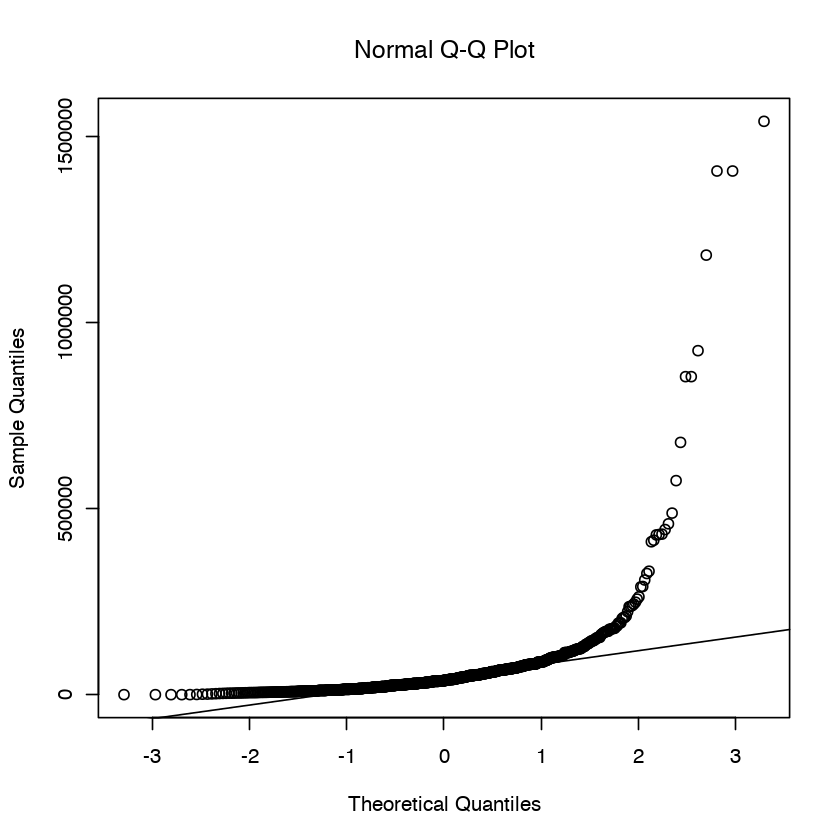

In [14]:
# Q-Q plot
qqnorm(cfb$INCOME)
qqline(cfb$INCOME)

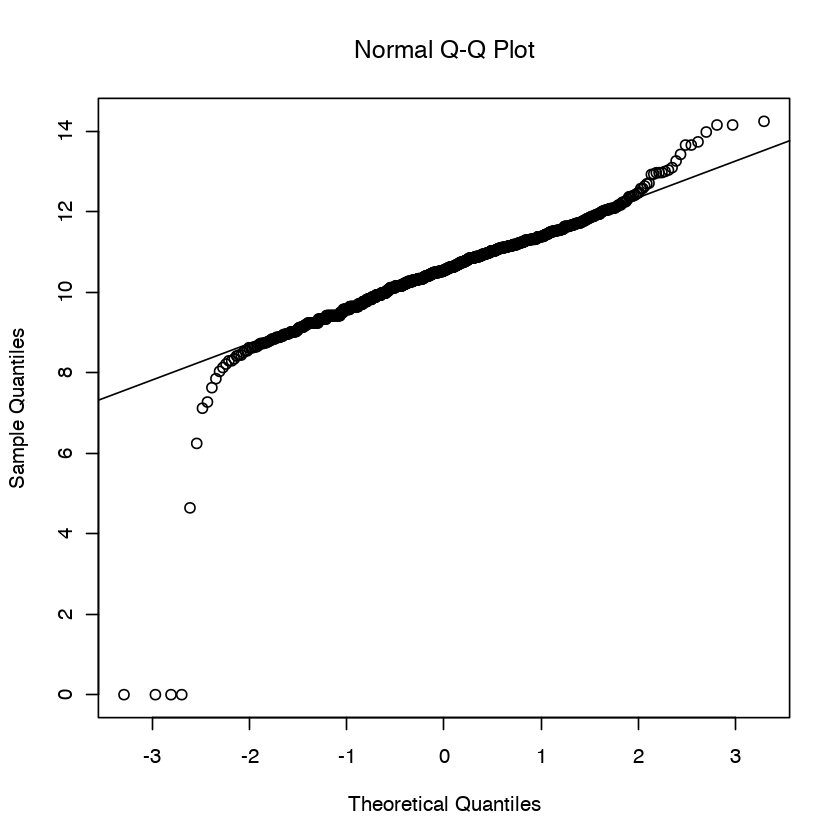

In [16]:
# INCOME Log 값으로 Q-Q plot 을 살펴보면
# 이번에는 qqnorm 이 qqline 에 밀접하게 근접해 있습니다.
qqnorm(cfb_log$INCOME_log)
qqline(cfb_log$INCOME_log)